# **Introducció**


La nostra base de dades tracta sobre el rendiment d’alumnes de secundària en dos escoles portugueses. Els atributs inclueixen dades sobre les seves calificacions, característiques demogràfiques, socials i característiques relacionades amb l’escola. Totes aquestes dades han sigut obtingudes de informes escolars i qüestionaris.

# **Llibreries**
Importem les llibreries que voldrem utilitzar en el projecte.

In [132]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [133]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split



# **Dades**
Llegim el csv amb totes les dades disponibles i les mostrem per pantalla

In [134]:
data = pd.read_csv("student-mat.csv")


Anem a observar els camps dels que disposem.

In [135]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Podem veure totes les variables. <br>Podem trobar més informació com quantes columnes i files tenim. (Podemos explicar todas las variables aquí).


In [136]:
data.shape

(395, 33)

Tenim 395 files i 33 columnes. <br>
Més info


**Explicació variables** <br>
Ara explicarem totes les variables de les que disposem en la base de dades.


**School:** Escola en que es forma l’estudiant <br>
**Sex:** Sexe de l’estudiant <br>
**Age:** Edat de l’estudiant <br>
**Family Size:** Mida de l’estudiant ( >3 o <3) <br>
**Parent Status:** Situació parental (junts o separats) <br>
**Mother Education:** Educació de la mare <br>
**Father Education:** Educació del pare <br>
**Mother Job:** Feina de la mare <br>
**Father Job:** Feina del pare <br>
**Reason (to choose the school):** Raó per la qual va triar l'escola <br>
**Guardian:** Tutor de l'estudiant <br>
**Travel time (to school):** Temps que triga per anar a l'escola <br>
**Study Time:** Temps que estudia <br>
**Failures (failed classes):** Classes que no ha anat <br>
**School Up (extra education):** Educació extra <br>
**Family Up (Family extra education support):** Educació extra familiar <br>
**Paid (Extra paid classes Math-Portuguese):** Ha pagat per classes extra <br>
**Activities (extra excurricular):** Activitats extracurriculars <br>
**Nursey (Attended to nursey school):** Ha atès a escola d'infermeria <br>
**Higher (wants higher education):** Vol educació superior <br>
**Internet (has internet):** Disposa d'Internet <br>
**Romantic (in a relationship):** Forma part d'una relació romàntica <br>
**Free time:** Temps lliure després de l'escola <br>
**Go out:** Surt amb els amics <br>
**Day Alcohol Consumtion (during week):** Consumeix alcohol durant la setmana <br>
**Weekend Alcohol Consumption:** Consumeix alcohol durant el cap de setmana <br>
**Health:** Situació actual de salut <br>
**Absence:** Número de cops que ha faltat a classe <br>
**G1:** Notes del primer període <br>
**G2:** Notes del segon període <br>
**G3:** Notes del tercer període <br>



Per obtenir més informació podem efecutar describe() on ens mostrarà informació com la mitja, el mínim, màxim, quartils ... En el nostre cas aquesta informació no ens serà útil ja que no la necesitemn en la forma d¡aplicar-ho però pots conèixer més informació sobre les dades on treballes.


In [137]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Ara volem saber si d'aquestes columnes hi alguna amb molt valors NULLS per poder treure-la.

In [138]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No hi ha cap columna amb NULLS per tant ara volem definir quines d'aquestes variables serán útils per al nostre objectiu. (Eliminem les variables que no volem)


In [139]:
data = data.drop(['school', 'famsize', 'Pstatus', 'Fedu', 'Medu', 'Fjob', 'Mjob', 'reason', 'guardian', 'traveltime', 'famsup', 'nursery',  'internet', 'goout', 'Dalc'], axis = 1)

In [140]:
data.shape

(395, 18)

# **Data Transformation**



In [141]:


data.nunique()




sex            2
age            8
address        2
studytime      4
failures       4
schoolsup      2
paid           2
activities     2
higher         2
romantic       2
famrel         5
freetime       5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [142]:
data.head()

,sex,age,address,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,Walc,health,absences,G1,G2,G3
0,F,18,U,2,0,yes,no,no,yes,no,4,3,1,3,6,5,6,6
1,F,17,U,2,0,no,no,no,yes,no,5,3,1,3,4,5,5,6
2,F,15,U,2,3,yes,yes,no,yes,no,4,3,3,3,10,7,8,10
3,F,15,U,3,0,no,yes,yes,yes,yes,3,2,1,5,2,15,14,15
4,F,16,U,2,0,no,yes,no,yes,no,4,3,2,5,4,6,10,10


# **Taking all data x and y**

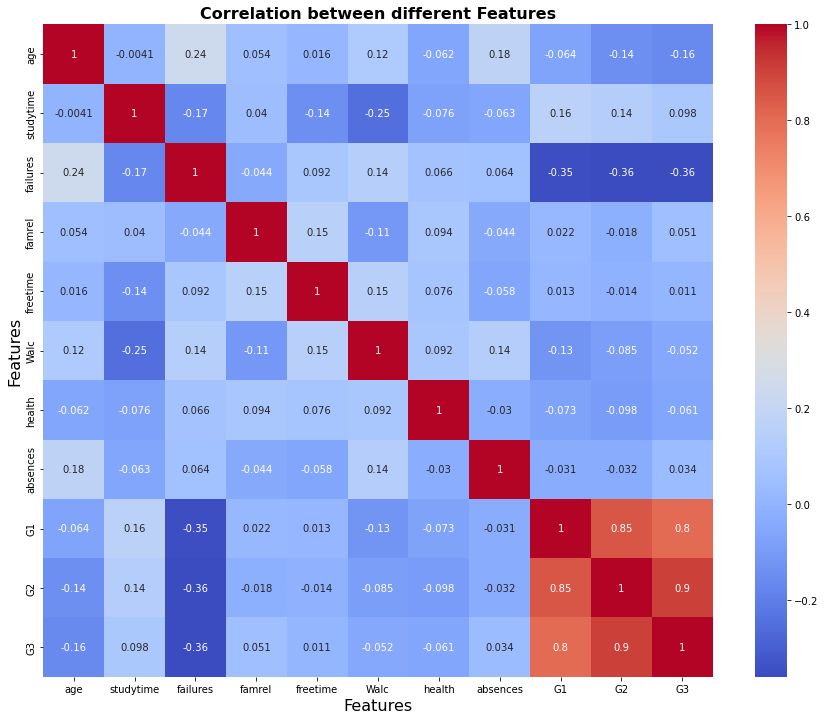

In [143]:

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,12))

ax = sns.heatmap(data=data.corr(), ax=ax,annot=True, cmap="coolwarm")
ax.set_xlabel('Features',fontdict={"fontsize":16})
ax.set_ylabel('Features',fontdict={"fontsize":16})
ax.set_title('Correlation between different Features', loc="center", fontdict={"fontsize": 16, "fontweight":"bold"})

plt.show()

In [144]:
import numpy as np
from sklearn.metrics import mean_squared_error

def mse(v1, v2):
    return ((v1 - v2)**2).mean()



In [145]:
from sklearn.linear_model import LinearRegression
def regression(x, y):
    # Creem un objecte de regressió de sklearn

    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr



In [146]:
## Transforming data unicode

In [147]:

data['schoolsup'] = data['schoolsup'].replace(['no'],0)
data['schoolsup'] = data['schoolsup'].replace(['yes'],1)
data['sex'] = data['sex'].replace(['M'],0)
data['sex'] = data['sex'].replace(['F'],1)

data['address'] = data['address'].replace(['U'],0)
data['address'] = data['address'].replace(['R'],1)
#No --> 0
#Yes -->1
data['paid'] = data['paid'].replace(['no'],0)
data['paid'] = data['paid'].replace(['yes'],1)
data['activities'] = data['activities'].replace(['no'],0)
data['activities'] = data['activities'].replace(['yes'],1)
data['romantic'] = data['romantic'].replace(['no'],0)
data['romantic'] = data['romantic'].replace(['yes'],1)
data['higher'] = data['higher'].replace(['no'],0)
data['higher'] = data['higher'].replace(['yes'],1)
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [148]:
#Normalization linear
min_max = MinMaxScaler()
dataNormalize = min_max.fit_transform(data)

df = pd.DataFrame(dataNormalize, columns=['sex','age','address',  'studytime' , 'failures' ,
                                          'schoolsup', 'paid', 'activities' ,'higher',
                                          'romantic' , 'famrel' ,' freetime ' ,'Walc','health','absences' , 'G1' ,' G2', 'G3'])

x_df =  df.iloc[:,:-1]
y_df = df.iloc[:,-1]




In [149]:
##Aplying standarization
# we need x to have x standarize. We already normalize so we probably dont need it
x = x_df.to_numpy()


def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

x_t = standarize(x)

print(x_t)


[[ 0.94817639  1.02304645 -0.53539233 ...  0.03642446 -1.78246688
  -1.25479105]
 [ 0.94817639  0.23837976 -0.53539233 ... -0.21379577 -1.78246688
  -1.52097927]
 [ 0.94817639 -1.33095364 -0.53539233 ...  0.53686493 -1.1791469
  -0.72241461]
 ...
 [-1.05465609  3.37704655  1.86778916 ... -0.33890588 -0.27416693
  -0.72241461]
 [-1.05465609  1.02304645  1.86778916 ... -0.71423623  0.02749306
   0.34233827]
 [-1.05465609  1.80771315 -0.53539233 ... -0.08868565 -0.87748691
  -0.45622639]]


     sex       age  address  studytime  failures  schoolsup  paid  activities  \
0    1.0  0.428571      0.0   0.333333  0.000000        1.0   0.0         0.0   
1    1.0  0.285714      0.0   0.333333  0.000000        0.0   0.0         0.0   
2    1.0  0.000000      0.0   0.333333  1.000000        1.0   1.0         0.0   
3    1.0  0.000000      0.0   0.666667  0.000000        0.0   1.0         1.0   
4    1.0  0.142857      0.0   0.333333  0.000000        0.0   1.0         0.0   
..   ...       ...      ...        ...       ...        ...   ...         ...   
390  0.0  0.714286      0.0   0.333333  0.666667        0.0   1.0         0.0   
391  0.0  0.285714      0.0   0.000000  0.000000        0.0   0.0         0.0   
392  0.0  0.857143      1.0   0.000000  1.000000        0.0   0.0         0.0   
393  0.0  0.428571      1.0   0.000000  0.000000        0.0   0.0         0.0   
394  0.0  0.571429      0.0   0.000000  0.000000        0.0   0.0         0.0   

     higher  romantic  famr

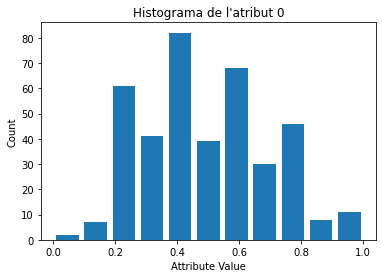

In [150]:
##Se puede mostrar el lineal normalize y el standarize normalize

print(x_df)
plt.figure()
plt.title("Histograma de l'atribut 0")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,15], bins=11, range=[np.min(x[:,0]), np.max(x[:,0])], histtype="bar", rwidth=0.8)

/var/folders/p5/lqmtl3dd4b7_xq65rgrxjh580000gn/T/ipykernel_26446/731611770.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['G2'],1).hist()


array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'address'}>,
        <AxesSubplot:title={'center':'studytime'}>],
       [<AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'schoolsup'}>,
        <AxesSubplot:title={'center':'paid'}>,
        <AxesSubplot:title={'center':'activities'}>],
       [<AxesSubplot:title={'center':'higher'}>,
        <AxesSubplot:title={'center':'romantic'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>],
       [<AxesSubplot:title={'center':'Walc'}>,
        <AxesSubplot:title={'center':'health'}>,
        <AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'G1'}>],
       [<AxesSubplot:title={'center':'G3'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

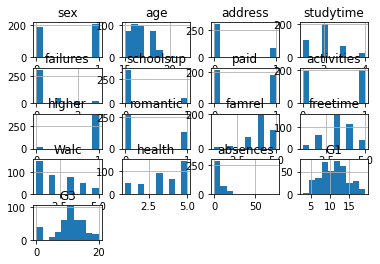

In [151]:
data.drop(['G2'],1).hist()

In [152]:
x_df

,sex,age,address,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,Walc,health,absences,G1,G2
0,1.0,0.428571,0.0,0.333333,0.000000,1.0,0.0,0.0,1.0,0.0,0.75,0.50,0.00,0.50,0.080000,0.1250,0.315789
1,1.0,0.285714,0.0,0.333333,0.000000,0.0,0.0,0.0,1.0,0.0,1.00,0.50,0.00,0.50,0.053333,0.1250,0.263158
2,1.0,0.000000,0.0,0.333333,1.000000,1.0,1.0,0.0,1.0,0.0,0.75,0.50,0.50,0.50,0.133333,0.2500,0.421053
3,1.0,0.000000,0.0,0.666667,0.000000,0.0,1.0,1.0,1.0,1.0,0.50,0.25,0.00,1.00,0.026667,0.7500,0.736842
4,1.0,0.142857,0.0,0.333333,0.000000,0.0,1.0,0.0,1.0,0.0,0.75,0.50,0.25,1.00,0.053333,0.1875,0.526316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.0,0.714286,0.0,0.333333,0.666667,0.0,1.0,0.0,1.0,0.0,1.00,1.00,1.00,0.75,0.146667,0.3750,0.473684
391,0.0,0.285714,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.25,0.75,0.75,0.25,0.040000,0.6875,0.842105
392,0.0,0.857143,1.0,0.000000,1.000000,0.0,0.0,0.0,1.0,0.0,1.00,1.00,0.50,0.50,0.040000,0.4375,0.421053
393,0.0,0.428571,1.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.75,0.75,0.75,1.00,0.000000,0.5000,0.631579


In [153]:
from sklearn.metrics import r2_score



     sex       age  address  studytime  failures  schoolsup  paid  activities  \
0    1.0  0.428571      0.0   0.333333  0.000000        1.0   0.0         0.0   
1    1.0  0.285714      0.0   0.333333  0.000000        0.0   0.0         0.0   
2    1.0  0.000000      0.0   0.333333  1.000000        1.0   1.0         0.0   
3    1.0  0.000000      0.0   0.666667  0.000000        0.0   1.0         1.0   
4    1.0  0.142857      0.0   0.333333  0.000000        0.0   1.0         0.0   
..   ...       ...      ...        ...       ...        ...   ...         ...   
390  0.0  0.714286      0.0   0.333333  0.666667        0.0   1.0         0.0   
391  0.0  0.285714      0.0   0.000000  0.000000        0.0   0.0         0.0   
392  0.0  0.857143      1.0   0.000000  1.000000        0.0   0.0         0.0   
393  0.0  0.428571      1.0   0.000000  0.000000        0.0   0.0         0.0   
394  0.0  0.571429      0.0   0.000000  0.000000        0.0   0.0         0.0   

     higher  romantic  famr

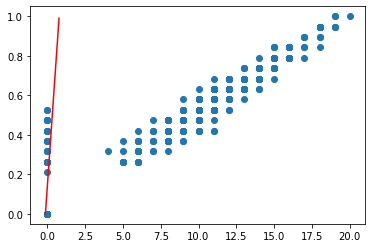

In [154]:
# Gràfic amb totes les variables anteriors. Aquestes no tenen gran correlació.
# Que passa si les eliminem i només tenim les que tenen correlació més gran de 60%
# Quin MSE obtindriem?
# Quin R2Score?


regr = regression(x_df, y_df)
predicted = regr.predict(x_df)


# sns.ploet(failures, G3)
print(x_df)
x_df1 = x_df.to_numpy()
plt.figure()
# predicció de xx
# s'ha de mutiplicar per xx per que es el range que li diem que ha de tirar
# sino anira a tots.
xx = np.arange(0, 1, 0.01)
ax = plt.scatter(y, x_df1[:,16])
plt.plot(regr.coef_[16] *  xx+ regr.intercept_ , xx,'r')

print(regr.intercept_)
MSE = mse(y_df, predicted)
r2 = r2_score(y_df, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)

In [155]:

data_total =  data.iloc[:,[15,16,17]]





(395,)
(395, 2)
Mean squeared error:  0.009308188940329028
R2 score:  0.8221632333156185


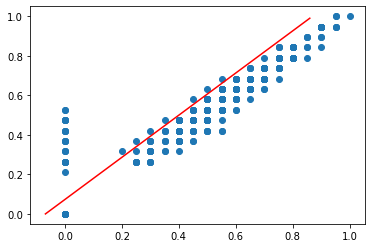

In [156]:
# Quin MSE obtindriem? s'obté un MSE un pel més elevat que l'anterior PER QUE?
# Quin R2Score?

# sns.ploet(failures, G3)
min_max = MinMaxScaler()
dataNormalize_2 = min_max.fit_transform(data_total)


total= pd.DataFrame(dataNormalize_2,columns=[
                                          'G1' ,'G2', 'G3'])
x1_ = total.iloc[:,:-1]
y1_= total.iloc[:,-1]

regr = regression(x1_, y1_)
predicted = regr.predict(x1_)

plt.figure()
# predicció de xx
# s'ha de mutiplicar per xx per que es el range que li diem que ha de tirar
# sino anira a tots.
print(y1_.shape)
print(x1_.shape)
xx = np.arange(0, 1, 0.01)
ax = plt.scatter( y1_,x1_['G2'])
plt.plot(regr.coef_[1] *  xx+ regr.intercept_ , xx,'r')


MSE = mse(y1_, predicted)
r2 = r2_score(y1_, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)



In [157]:

"""WHAT TO DO NEXT??

    Why MSE error is higher?
    Why R2 Score is lower?

    Waht would happen just with G2 and G1?

    Clean the code.

    Documentation of variables. What we see? Why? Which variables we shoudn't use
    and why?

    Can we do anything to improve de prediction?

    
"""

"WHAT TO DO NEXT??\n\n    Why MSE error is higher?\n    Why R2 Score is lower?\n\n    Waht would happen just with G2 and G1?\n\n    Clean the code.\n\n    Documentation of variables. What we see? Why? Which variables we shoudn't use\n    and why?\n\n    Can we do anything to improve de prediction?\n\n    \n"

In [158]:
""" Per a assegurar-nos que el model s'ajusta be a dades noves, no vistes,
cal evaluar-lo en un conjunt de validacio (i un altre de test en situacions reals).
Com que en aquest cas no en tenim, el generarem separant les dades en
un 80% d'entrenament i un 20% de validació.
"""

def split_data(x, y, train_ratio=0.85):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:]
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x1_.to_numpy(), y1_.to_numpy())

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))


Error en atribut 0: 0.019528
R2 score en atribut 0: 0.581616
Error en atribut 1: 0.005212
R2 score en atribut 1: 0.888328


In [159]:
x1_ = data_total =  data.iloc[:,[15,16]]
y1_ = data['G3']
print(x1_)
mean_x = np.mean(x1_)
mean_y = np.mean(y1_)
x = x1_.to_numpy()
y = y1_.to_numpy()



     G1  G2
0     5   6
1     5   5
2     7   8
3    15  14
4     6  10
..   ..  ..
390   9   9
391  14  16
392  10   8
393  11  12
394   8   9

[395 rows x 2 columns]


In [160]:
## aplying Linear regression without Scklearn
# 1 calcular funció de cost --> mean squared error

#calculate mean


# total no.of input values
m = len(x1_)

# using the formula to calculate m & c
numer = 0
denom = 0
print(mean_y)
print(mean_x)

for i in range(m):
  numer += (x[i] - mean_x) * (y[i] - mean_y)
  denom += (x[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)
print("m --> (x - mean_x * y - mean y) /  (x - mean_x ) ^ 2")
print (f'm = {m} \n c = {c}')

10.415189873417722
G1    10.908861
G2    10.713924
dtype: float64
m --> (x - mean_x * y - mean y) /  (x - mean_x ) ^ 2
m = G1    1.106256
G2    1.102112
dtype: float64 
 c = G1   -1.652804
G2   -1.392758
dtype: float64


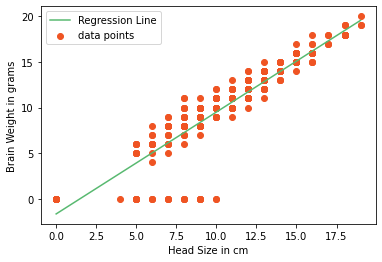

In [161]:
max_x = np.max(x)
min_x = np.min(y)
# calculating line values x and y
X = np.linspace (min_x, max_x, 2)
Y = c + m * X

plt.plot(X, Y, color='#58b970', label='Regression Line')
plt.scatter(x[:,1], y, c='#ef5423', label='data points')

plt.xlabel('Head Size in cm')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()


In [163]:
from sklearn.metrics import r2_score
# calculating R-squared value for measuring goodness of our model.



ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals

for i in range(int(2)): # val_count represents the no.of input x values
  y_pred = c + m * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

G1    0.999856
G2    0.999705
dtype: float64
